<a href="https://colab.research.google.com/github/2024S2-ML/.github/blob/main/C%C3%B3pia_de_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carregar o dataset
dataset = pd.read_csv('/content/Iris.csv')

In [ ]:
# Visualizar as primeiras linhas do dataset
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Verificar se há valores faltantes
print(dataset.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# Informações sobre o dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
# Descrição estatística do dataset
print(dataset.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
# Ver as classes únicas no dataset
print("Classes únicas:", dataset['Species'].unique())

Classes únicas: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# Análise exploratória dos dados
sns.pairplot(dataset, hue='Species', markers=["o", "s", "D"])
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# Separar as características (X) e o rótulo (y)
X = dataset.iloc[:, 1:5].values  # Pegando as colunas de características
y = dataset.iloc[:, 5].values    # Pegando a coluna 'Species'

In [ ]:
# Dividir os dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# Normalizar as características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treinando o modelo K-NN com K=5 (você pode testar outros valores de K)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Prever os resultados no conjunto de teste
y_pred = classifier.predict(X_test)

In [ ]:
# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.9777777777777777
Matriz de Confusão:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Relatório de Classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



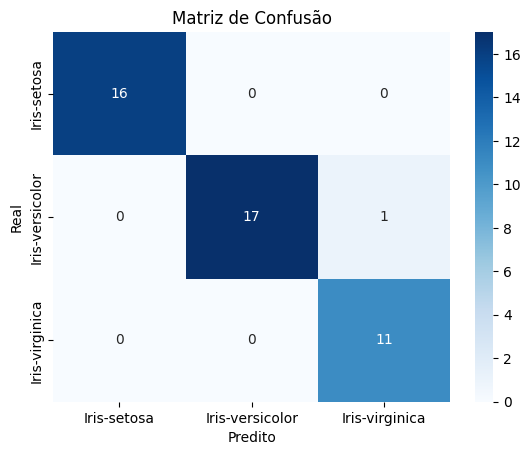

In [ ]:
# Exibir a matriz de confusão usando um heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset['Species'].unique(), yticklabels=dataset['Species'].unique())
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
# Testando diferentes valores de K e visualizando o impacto na acurácia
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

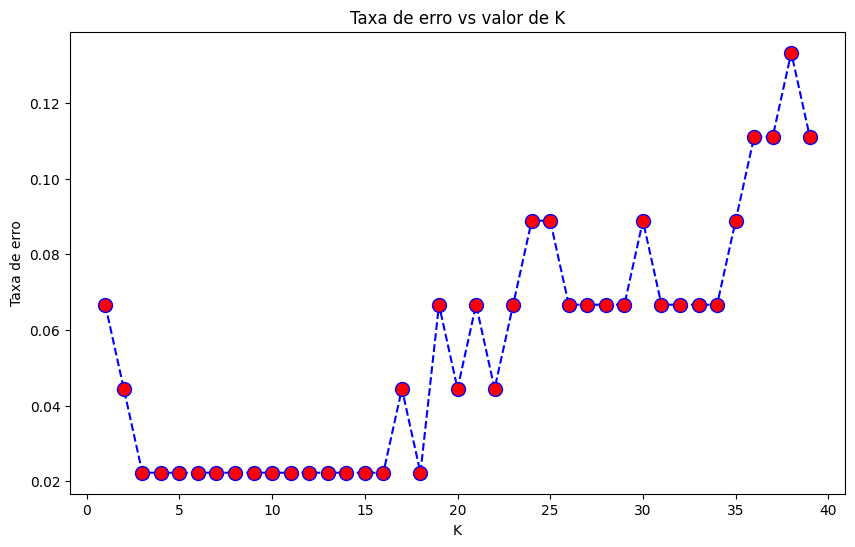

In [ ]:
# Exibir gráfico do erro vs K
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Taxa de erro vs valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
plt.show()